# **Contextualizando o problema**
Durante as últimas décadas, uma nova classe de materiais conhecidos como *MOFs* chamou atenção devido ao possível uso para adsorção de gases.


---
Uma pesquisadora recebeu uma planilha com diversas características de MOFs e a quantidade de metano que cada estrutura adsorve. Essa cientista não quer simular isotermas de adsorção para outras MOFs, então pensa em usar Machine Learning para predizer esses valores para outras estruturas.

A pedido dessa pesquisadora, você está responsável por treinar dois modelos de ML e apresentar os resultados obtidos.

# **Regressão Polinomial**



**1.   Preparação dos dados**

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

In [4]:
# Abrindo a planilhas
doc = pd.read_excel("./MOFs - workshop.xlsx")
doc

,void fraction,pore volume (cm3/g),Density (g/cm3),GSA (m2/g),PLD,LCD,Adsorcao (5.8bar e 280K)
0,0.234030,0.255564,1.524930,0.000,2.49720,4.45543,56.028176
1,0.172707,0.239596,1.565940,0.000,2.44162,3.53642,27.730762
2,0.686068,0.556041,1.151990,1028.920,6.80253,11.25251,130.543837
3,0.349898,0.277374,1.760820,367.010,4.14331,4.82084,69.488797
4,0.344895,0.270205,1.787600,331.008,4.08045,4.80529,68.306263
...,...,...,...,...,...,...,...
295,0.515192,0.522046,1.067320,1281.260,4.72091,7.75357,117.177771
296,0.263549,0.245797,1.965820,0.000,2.97810,3.14881,0.004526
297,0.137276,0.213642,1.937830,0.000,2.45444,2.87505,0.000895
298,0.167462,0.277008,1.627930,0.000,2.76284,2.99235,0.000126


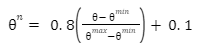

In [5]:
# Normalizando os dados entre 0.1 e 0.9
start = 0.1
end = 0.9
width = end - start

doc_norm = (doc - doc.min())/(doc.max()-doc.min())*width + start
doc_norm

,void fraction,pore volume (cm3/g),Density (g/cm3),GSA (m2/g),PLD,LCD,Adsorcao (5.8bar e 280K)
0,0.262409,0.119901,0.442947,0.100000,0.102672,0.131668,0.381644
1,0.208951,0.118172,0.453005,0.100000,0.101143,0.113253,0.239397
2,0.656473,0.152446,0.351487,0.225079,0.221070,0.267872,0.756221
3,0.363417,0.122263,0.500798,0.144615,0.147941,0.138991,0.449308
4,0.359056,0.121487,0.507365,0.140238,0.146212,0.138679,0.443363
...,...,...,...,...,...,...,...
295,0.507512,0.148764,0.330722,0.255754,0.163825,0.197758,0.689032
296,0.288142,0.118843,0.551072,0.100000,0.115897,0.105486,0.100022
297,0.178064,0.115360,0.544208,0.100000,0.101496,0.100000,0.100004
298,0.204379,0.122224,0.468207,0.100000,0.109977,0.102351,0.100000




**2.   Visualização dos dados**

In [6]:
# Importação de bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

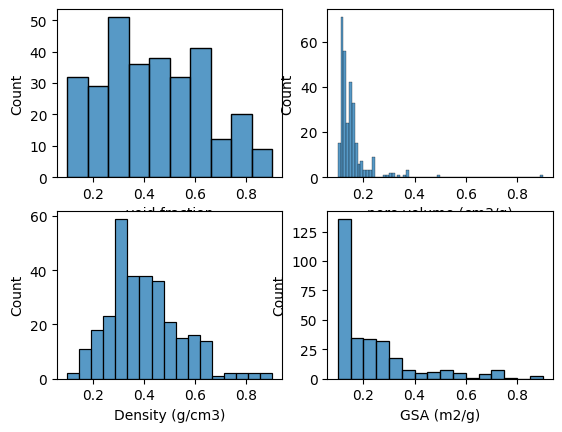

In [7]:
# Criação de histogramas
fig, axs = plt.subplots(2,2)
  # número de linhas e número de colunas

sns.histplot(data = doc_norm, x = 'void fraction', ax = axs [0,0])
sns.histplot(data = doc_norm, x = 'pore volume (cm3/g)', ax = axs [0,1])
sns.histplot(data = doc_norm, x = 'Density (g/cm3)', ax = axs [1,0])
sns.histplot(data = doc_norm, x = 'GSA (m2/g)', ax = axs [1,1])

plt.savefig('Histograma.png', format = 'png')
  # salvar a imagem

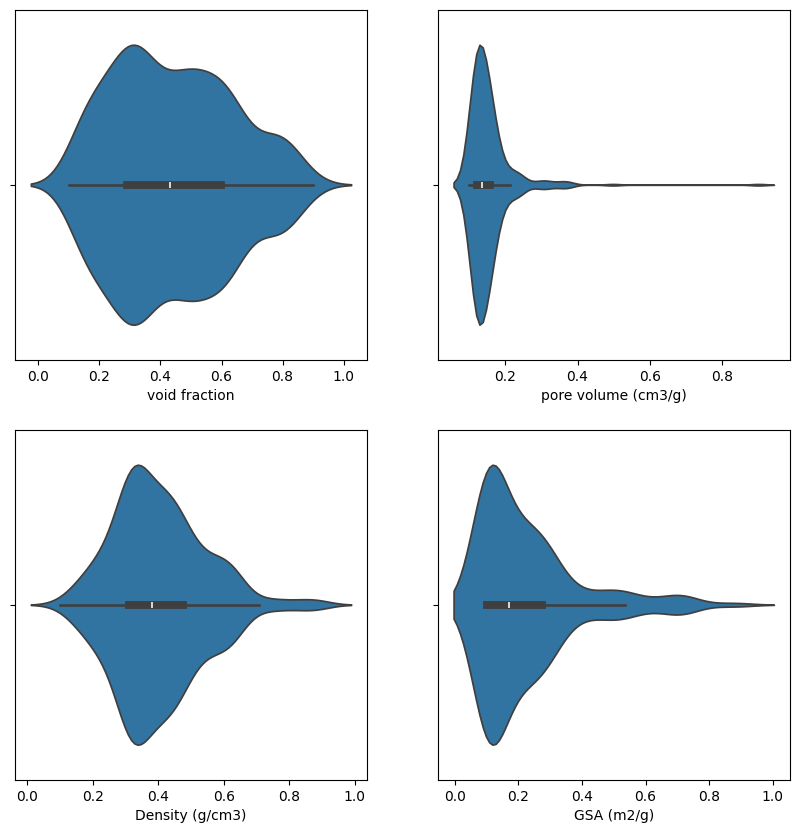

In [47]:
# Criação de gráficos violino
fig, axs = plt.subplots(2,2, figsize = (10,10))
  # número de linhas e número de colunas

sns.violinplot(data = doc_norm, x = 'void fraction', ax = axs [0,0])
sns.violinplot(data = doc_norm, x = 'pore volume (cm3/g)', ax = axs [0,1])
sns.violinplot(data = doc_norm, x = 'Density (g/cm3)', ax = axs [1,0])
sns.violinplot(data = doc_norm, x = 'GSA (m2/g)', ax = axs [1,1])

plt.savefig('Violino.png', format = 'png')



**3.   Aplicação do modelo**

In [22]:
# Importação de bibliotecas
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Separação de inputs e outputs
X = doc_norm.iloc[:,:6]
y = doc_norm.iloc[:,-1]

In [29]:
# Dados para futuro
y_max = doc.iloc[:,-1].max()
y_min = doc.iloc[:,-1].min()
y_dif = y_max - y_min

In [11]:
# Separação de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, shuffle=True)

In [23]:
# Aplicação do modelo
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predições
y_pred = modelo.predict(X_test)
y_train_pred = modelo.predict(X_train)

In [27]:
# Acurácia do modelo
test_acc = r2_score(np.array(y_test),y_pred)

train_acc = r2_score(np.array(y_train),y_train_pred)

In [30]:
# Desnormalização dos outputs
y_train = (((y_train - start)*(y_dif))/(width)) + y_min
y_test = (((y_test - start)*(y_dif))/(width)) + y_min
y_pred = (((y_pred - start)*(y_dif))/(width)) + y_min
y_train_pred = (((y_train_pred - start)*(y_dif))/(width)) + y_min

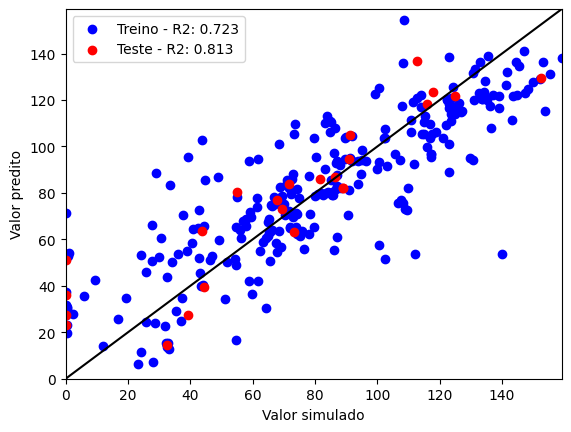

In [36]:
# Plotagem do gráfico
fig, ax = plt.subplots()

ax.scatter(y_train, y_train_pred, c = 'blue', label = 'Treino - R2: %0.3f'%float(train_acc))
ax.scatter(y_test, y_pred, c = 'red', label = 'Teste - R2: %0.3f'%float(test_acc))
ax.plot([0,y_max], [0,y_max], c = 'black')
  # traça a bissetriz do gráfico

plt.xlim(0, y_max)
plt.ylim(0, y_max)
  # limites dos eixos

plt.xlabel('Valor simulado')
plt.ylabel('Valor predito')
  # legendas dos eixos

plt.legend()
plt.show()

# **Random Forest**

In [37]:
# Importação de bibliotecas
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**1.   Otimização do modelo**

In [38]:
# Separação de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, shuffle=True)

In [39]:
# Aplicação do modelo
modelo = RandomForestRegressor()

params = {'n_estimators': [50,100,150,200], 'min_samples_split': [1,2,3,4,5]}

gs = GridSearchCV(modelo, params, cv = 5)
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [40]:
# Escolha do melhor modelo
melhor_modelo = gs.best_params_

In [41]:
# Predições com o modelo treinado
y_pred = gs.predict(X_test)
y_train_pred = gs.predict(X_train)

test_acc = r2_score(np.array(y_test),y_pred)
train_acc = r2_score(np.array(y_train),y_train_pred)
  # avaliação do modelo

In [42]:
# Desnormalização dos outputs
y_train = (((y_train - start)*(y_dif))/(width)) + y_min
y_test = (((y_test - start)*(y_dif))/(width)) + y_min
y_pred = (((y_pred - start)*(y_dif))/(width)) + y_min
y_train_pred = (((y_train_pred - start)*(y_dif))/(width)) + y_min

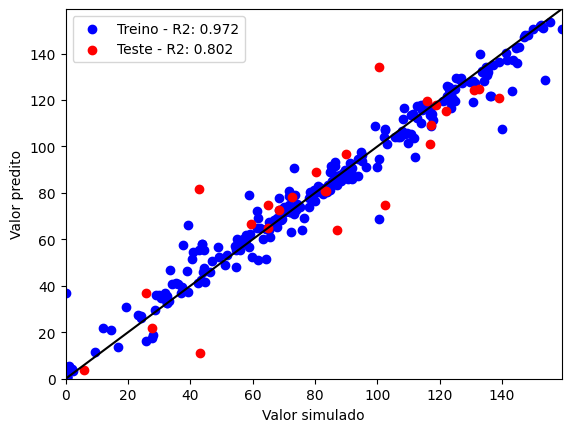

In [43]:
# Plotagem do gráfico
fig, ax = plt.subplots()

ax.scatter(y_train, y_train_pred, c = 'blue', label = 'Treino - R2: %0.3f'%float(train_acc))
ax.scatter(y_test, y_pred, c = 'red', label = 'Teste - R2: %0.3f'%float(test_acc))
ax.plot([0,y_max], [0,y_max], c = 'black')
  # traça a bissetriz do gráfico

plt.xlim(0, y_max)
plt.ylim(0, y_max)
  # limites dos eixos

plt.xlabel('Valor simulado')
plt.ylabel('Valor predito')
  # legendas dos eixos

plt.legend()
plt.show()